In [2]:
# Importing all necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer

from collections import defaultdict

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading in the data

countries = pd.read_csv(r'Country-data.csv')
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Exploratory Analysis

In [4]:
countries.shape

(167, 10)

In [5]:
countries.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [6]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
countries.isnull().any()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

Data does not have any missing values and all the features contain numerical data except for the column containing country names.

In [8]:
X = countries.drop('country', axis = 1)
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


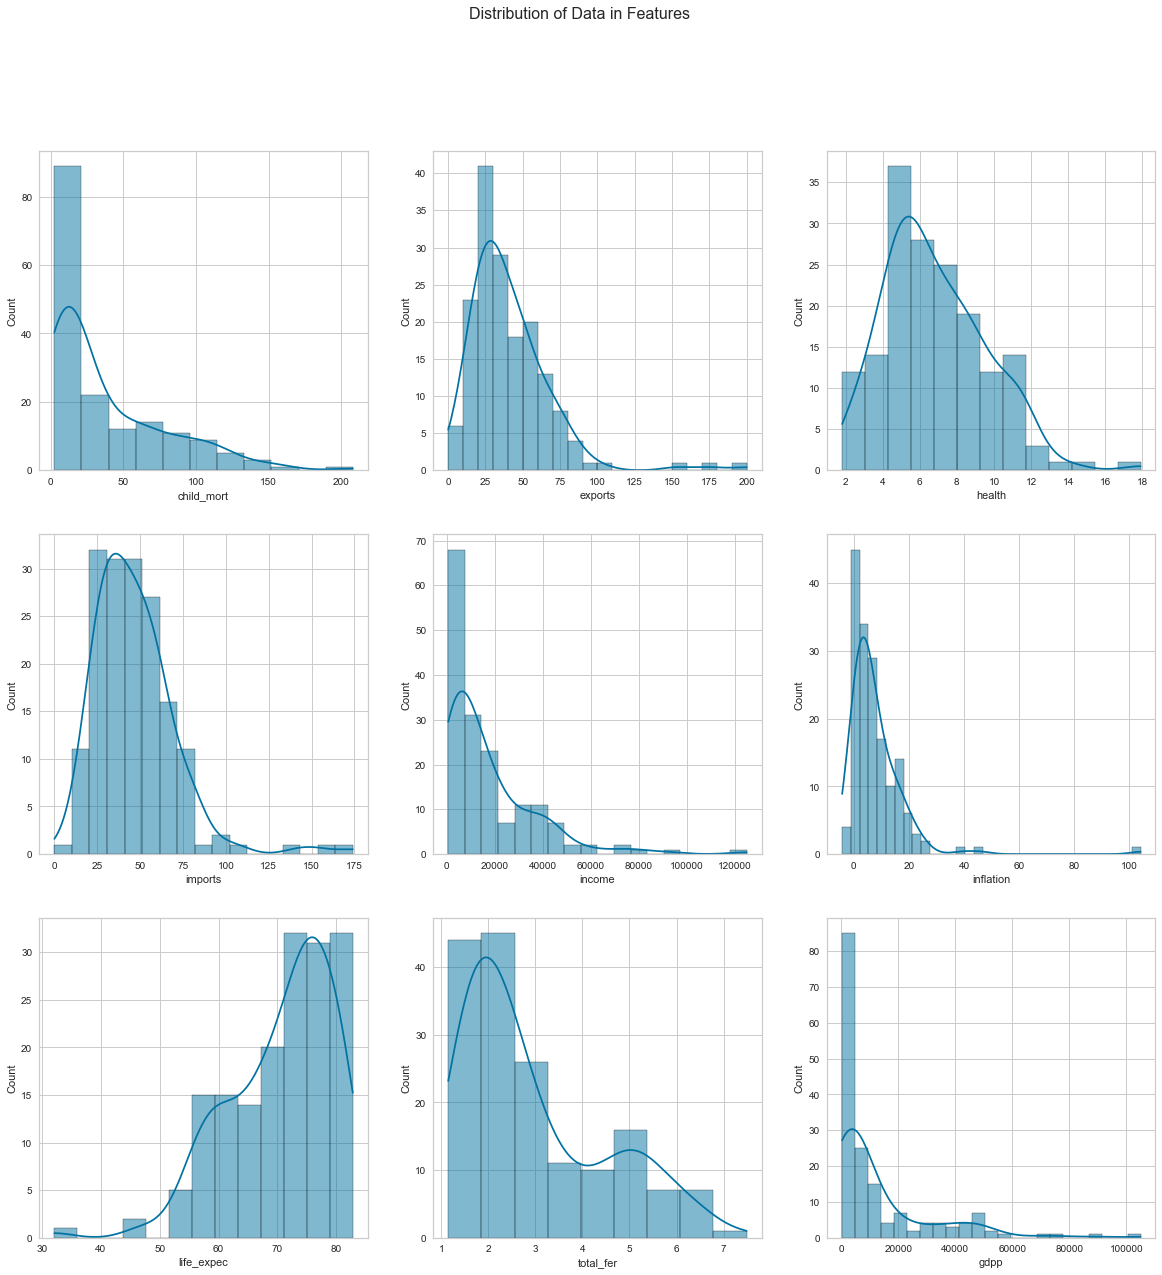

In [9]:
# Understanding data distribution

fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax = ax.flatten()
plt.suptitle('Distribution of Data in Features', fontsize=16)
for i, j in enumerate(X.columns):
    sns.histplot(X[j], ax = ax[i], kde=True)

# K- Means Clustering

In [10]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = list(X.columns))
X_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [11]:
inertia = []
clusters = [i for i in range(2,10)]
scores = {}
db_scores = {}

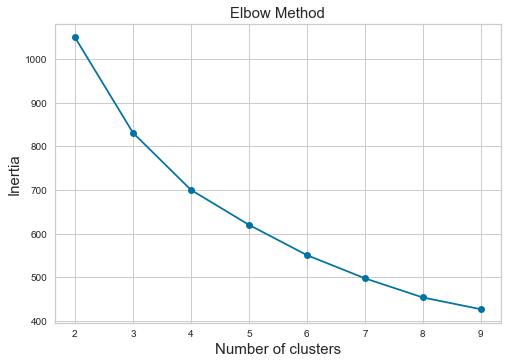

In [12]:
for c in clusters:
    kmeans = KMeans(n_clusters = c, init = 'k-means++')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
plt.plot(clusters,inertia,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)
plt.show()

Check out scores for 3-6 clusters

In [13]:
for s in range(3,7):
    kmeans = KMeans(n_clusters = s, init = 'k-means++')
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')
    db_score = davies_bouldin_score(X_scaled, kmeans.labels_)
    scores[s] = score
    db_scores[s] = db_score

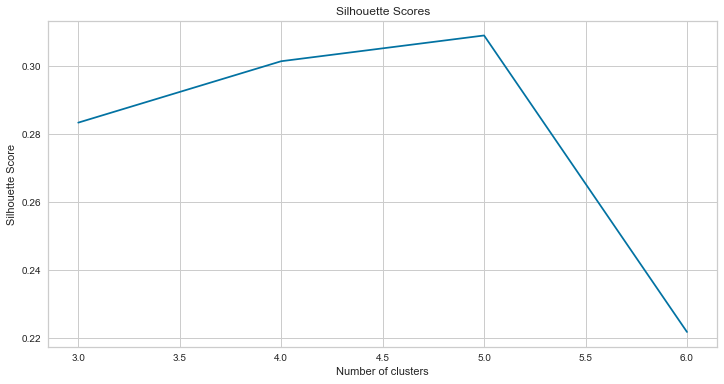

In [14]:
plt.figure(figsize=(12,6))
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.show()

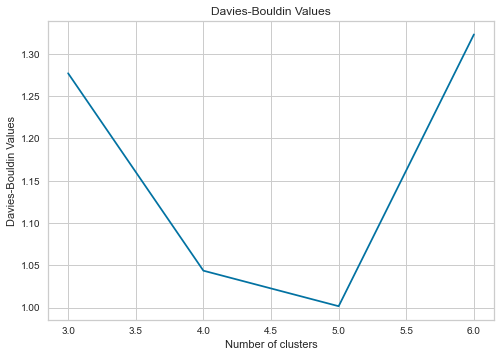

In [15]:
plt.plot(list(db_scores.keys()), list(db_scores.values()))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Values')
plt.title('Davies-Bouldin Values')
plt.show()

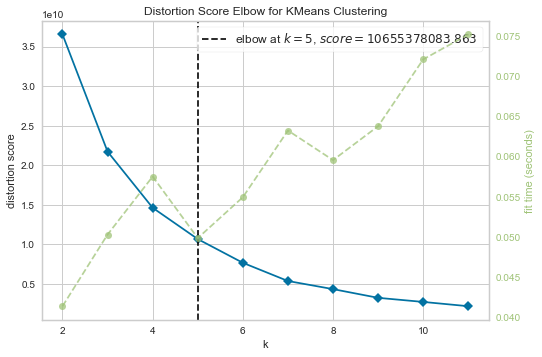

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
km = KMeans()
model = KElbowVisualizer(km, k = (2,12))
model.fit(X)
model.show()

As the silhouette score is highest and DB score is lowest for 5 clusters, we will use that to build our model. 

In [17]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
kmeans.fit(X_scaled)

KMeans(n_clusters=5)

In [18]:
print('Number of iterations carried out to find cluster centers: ', kmeans.n_iter_)

Number of iterations carried out to find cluster centers:  14


In [19]:
print(kmeans.cluster_centers_.shape)

(5, 9)


In [20]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns = [i for i in range(1,10)], index = ['Cluster ' + str(i) for i in range(5)])
print('The cluster centers in all feature dimensions are given below: ')
cluster_centers

The cluster centers in all feature dimensions are given below: 


,1,2,3,4,5,6,7,8,9
Cluster 0,1.393841,-0.454869,-0.177681,-0.166445,-0.709743,0.200563,-1.300734,1.391209,-0.613462
Cluster 1,-0.828609,0.172621,0.859190,-0.296373,1.462275,-0.478189,1.107649,-0.763681,1.661902
Cluster 2,-0.406799,0.006821,-0.194335,0.042611,-0.217238,-0.023553,0.241084,-0.416880,-0.332643
Cluster 3,-0.849003,4.935673,-0.008163,4.548058,2.439542,-0.504206,1.226824,-1.038863,2.440797
Cluster 4,2.281385,-0.578452,-0.637438,-1.221785,-0.624065,9.129718,-1.134121,1.916133,-0.581936


In [21]:
X['cluster'] = list(kmeans.labels_)
X['country'] = countries['country']
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,country
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,Afghanistan
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,Albania
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,Algeria
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,Angola
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,Antigua and Barbuda


In [22]:
# Creating a dictionary to store the country names in their respective clusters

clusters_info = defaultdict(list)
for indx, i in enumerate(X['cluster']):
    clusters_info[i].append(X.iloc[indx, :]["country"])
    
clusters_info

defaultdict(list,
            {0: ['Afghanistan',
              'Angola',
              'Benin',
              'Burkina Faso',
              'Burundi',
              'Cameroon',
              'Central African Republic',
              'Chad',
              'Comoros',
              'Congo, Dem. Rep.',
              'Congo, Rep.',
              "Cote d'Ivoire",
              'Equatorial Guinea',
              'Eritrea',
              'Gabon',
              'Gambia',
              'Ghana',
              'Guinea',
              'Guinea-Bissau',
              'Haiti',
              'Kenya',
              'Kiribati',
              'Lao',
              'Lesotho',
              'Liberia',
              'Madagascar',
              'Malawi',
              'Mali',
              'Mauritania',
              'Mozambique',
              'Namibia',
              'Niger',
              'Pakistan',
              'Rwanda',
              'Senegal',
              'Sierra Leone',
              'South Africa'

In [23]:
X_cluster_mean = X.groupby('cluster').mean()
X_cluster_mean.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,94.313636,28.677500,6.329091,42.872727,3503.250000,9.895568,59.022727,5.047727,1753.909091
1,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333
2,21.913483,41.295382,6.283483,47.918718,12969.325843,7.533607,72.693258,2.318764,6885.528090
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
4,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


In [24]:
means = X_cluster_mean.describe().iloc[1]
print(means)

child_mort       51.062757
exports          63.419910
health            6.728915
imports          60.918956
income        26181.181835
inflation        25.327875
life_expec       70.805197
total_fer         3.276365
gdpp          22373.887436
Name: mean, dtype: float64


In [25]:
X_cluster_compare = X_cluster_mean.copy()
for index, columns in X_cluster_compare.iterrows():
    for col in range(len(columns)):
        if X_cluster_compare.iloc[index, col]>means[col]:
            X_cluster_compare.iloc[index, col] = 'Above'
        else:
            X_cluster_compare.iloc[index, col] = 'Below'

In [26]:
 X_cluster_compare

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,Above,Below,Below,Below,Below,Below,Below,Above,Below
1,Below,Below,Above,Below,Above,Below,Above,Below,Above
2,Below,Below,Below,Below,Below,Below,Above,Below,Below
3,Below,Above,Above,Above,Above,Below,Above,Below,Above
4,Above,Below,Below,Below,Below,Above,Below,Above,Below


On comparing all the socio-economic factors of all the clusters, cluster labeled 0 will be used for further clustering. Cluster labelled 4 has only one country, i.e, Nigeria, which does require financial aid to boost its health sector to improve child mortality rate and general health infrastructure and also tackle the economic crisis in the country.

Now, we will try to cluster the countries in cluster labelled 0 further to identify the countries in urgent need of aid.

In [27]:
X_0 = X[X['cluster'] == 0].reset_index(drop=True).drop('cluster', axis = 1)
X_0.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,Afghanistan
1,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,Angola
2,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,Benin
3,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,Burkina Faso
4,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,Burundi


In [63]:
# Function that returns the scaled data in all the features

def scale(data):
    scaler = StandardScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(data.drop('country', axis = 1)), columns = list(data.drop('country', axis = 1)))
    scaled_data['country'] = data['country']
    return scaled_data

In [64]:
# Function to identify the number of clusters in which the scaled data will be divided

def plot_cluster_eval(data, lower_bound, upper_bound):
    scaled_df = data.drop('country', axis =1)
    sub_scores = {}
    sub_db_scores = {}
    inertia = []
    clusters = [i for i in range(lower_bound, upper_bound + 1)]
   
    for c in clusters:
        kmeans = KMeans(n_clusters = c, init = 'k-means++')
        kmeans.fit(scaled_df)
        inertia.append(kmeans.inertia_)
        score = silhouette_score(scaled_df, kmeans.labels_, metric='euclidean')
        db_score = davies_bouldin_score(scaled_df, kmeans.labels_)
        sub_scores[c] = score
        sub_db_scores[c] = db_score
    
    plt.figure(figsize=(12,6))
    plt.plot(clusters,inertia,marker='o')
    plt.title('Elbow Method',fontsize=15)
    plt.xlabel('Number of clusters',fontsize=15)
    plt.ylabel('Inertia',fontsize=15)
    plt.show()
    
    plt.figure(figsize=(12,6))
    plt.plot(list(sub_scores.keys()), list(sub_scores.values()))
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores')
    plt.show()
    
    plt.figure(figsize=(12,6))
    plt.plot(list(sub_db_scores.keys()), list(sub_db_scores.values()))
    plt.xlabel('Number of clusters')
    plt.ylabel('Davies-Bouldin Values')
    plt.title('Davies-Bouldin Values')
    plt.show()

In [30]:
X_0_scaled = pd.DataFrame(scale(X_0))
print('Number of countries for further clustering: ', X_0_scaled.shape[0])
X_0_scaled.head()

Number of countries for further clustering:  44


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,-0.128621,-1.017270,0.466527,0.114964,-0.349659,-0.061992,-0.436692,0.768828,-0.411738,Afghanistan
1,0.771866,1.831249,-1.297529,0.001547,0.442649,1.701560,0.166660,1.107311,0.608942,Angola
2,0.521731,-0.265653,-0.831341,-0.321694,-0.310875,-1.226127,0.429660,0.310880,-0.341452,Benin
3,0.678065,-0.516192,0.153249,-0.752681,-0.382903,-0.419874,-0.173692,0.818605,-0.404195,Burkina Faso
4,-0.022313,-1.076092,1.965789,-0.208276,-0.505905,0.327187,-0.204634,1.206865,-0.522137,Burundi


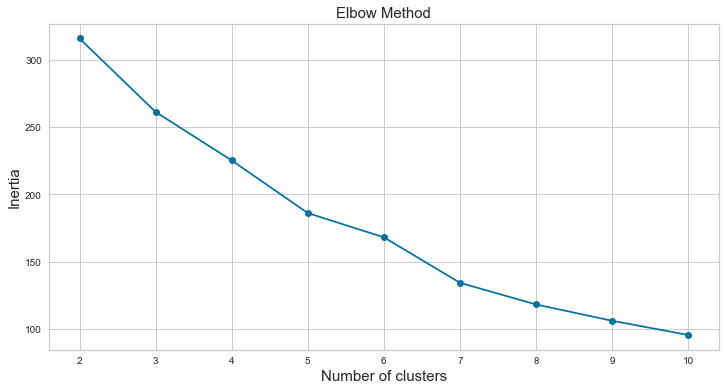

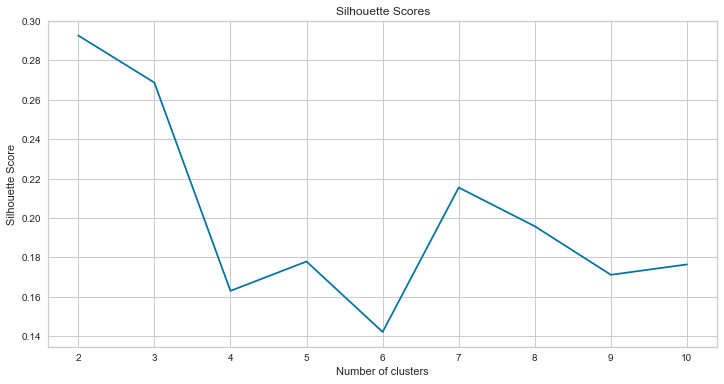

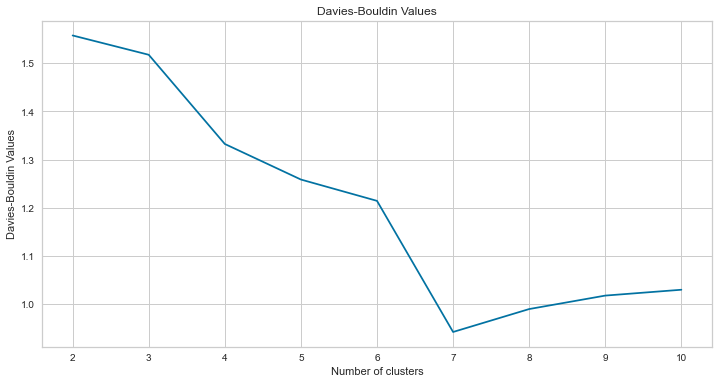

In [39]:
plot_cluster_eval(X_0_scaled, 2, 10)

We can choose 7 or 8 subclusters after assessment of silhouette and davies-bouldin scores. On choosing lower number of clusters, i.e., 2 or 3, we will be increasing the davies-bouldin score which reflects poor clustering. We will move forward with 7 sub-clusters. 

In [45]:
kmeans = KMeans(n_clusters = 7)
kmeans.fit(X_0_scaled.drop('country', axis = 1))
X_0['cluster_label'] = kmeans.labels_
X_0.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,cluster_label
0,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,Afghanistan,1
1,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,Angola,5
2,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,Benin,1
3,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,Burkina Faso,1
4,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,Burundi,1


In [46]:
X_0_mean = X_0.groupby('cluster_label').mean()
X_0_mean

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_label,,,,,,,,,
0,83.900000,23.933333,11.400000,91.166667,1603.333333,3.713333,56.000000,4.053333,995.666667
1,112.300000,25.264211,6.731053,38.726316,1519.105263,8.139211,56.352632,5.734211,652.368421
2,111.000000,85.800000,4.480000,58.900000,33700.000000,24.900000,60.900000,5.210000,17100.000000
3,208.000000,15.300000,6.910000,64.700000,1500.000000,5.450000,32.100000,3.330000,662.000000
4,70.835714,19.763571,5.432857,34.835714,2500.000000,10.768571,64.342857,4.720714,1095.571429
5,93.433333,66.033333,3.240000,52.933333,4803.333333,20.666667,62.900000,5.363333,2490.000000
6,57.800000,44.700000,6.406667,35.666667,11953.333333,8.836667,58.600000,3.423333,7073.333333


In [47]:
means = X_0_mean.describe().iloc[1]
means

child_mort     105.324150
exports         40.113493
health           6.371511
imports         53.846957
income        8225.586466
inflation       11.782064
life_expec      55.885070
total_fer        4.547846
gdpp          4295.562836
Name: mean, dtype: float64

In [48]:
X_0_compare = X_0_mean.copy()
for index, columns in X_0_compare.iterrows():
    for col in range(len(columns)):
        if X_0_compare.iloc[index, col]>means[col]:
            X_0_compare.iloc[index, col] = 'Above'
        else:
            X_0_compare.iloc[index, col] = 'Below'

X_0_compare

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_label,,,,,,,,,
0,Below,Below,Above,Above,Below,Below,Above,Below,Below
1,Above,Below,Above,Below,Below,Below,Above,Above,Below
2,Above,Above,Below,Above,Above,Above,Above,Above,Above
3,Above,Below,Above,Above,Below,Below,Below,Below,Below
4,Below,Below,Below,Below,Below,Below,Above,Above,Below
5,Below,Above,Below,Below,Below,Above,Above,Above,Below
6,Below,Above,Above,Below,Above,Below,Above,Below,Above


In [49]:
cluster_0_info = defaultdict(list)
for indx, i in enumerate(X_0['cluster_label']):
    cluster_0_info[i].append(X_0.iloc[indx, :]["country"])

sorted_keys = sorted(cluster_0_info.keys())
cluster_0_info = {key: cluster_0_info[key] for key in sorted_keys}
    
for key, value in cluster_0_info.items():
    print('Cluster Number ', key+1, ':', value)

Cluster Number  1 : ['Kiribati', 'Lesotho', 'Liberia']
Cluster Number  2 : ['Afghanistan', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Guinea', 'Guinea-Bissau', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Sierra Leone', 'Togo', 'Uganda', 'Zambia']
Cluster Number  3 : ['Equatorial Guinea']
Cluster Number  4 : ['Haiti']
Cluster Number  5 : ['Comoros', 'Eritrea', 'Gambia', 'Ghana', 'Kenya', 'Lao', 'Madagascar', 'Pakistan', 'Rwanda', 'Senegal', 'Sudan', 'Tanzania', 'Timor-Leste', 'Yemen']
Cluster Number  6 : ['Angola', 'Congo, Rep.', 'Mauritania']
Cluster Number  7 : ['Gabon', 'Namibia', 'South Africa']


On examining the mean socio-economic factors after clustering the countries based on same, countries in cluster number 2 and cluster number 4 require financial aid to tackle the issues, respective countries are facing in multiple forms such as poor health infrastructure, economic turmoils, poor human development index and much more.

In [50]:
X_1 = X_0[np.logical_or(X_0['cluster_label'] == 1, X_0['cluster_label'] == 3)].drop('cluster_label', axis = 1).reset_index(drop = True)
X_1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,Afghanistan
1,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,Benin
2,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,Burkina Faso
3,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,Burundi
4,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,Cameroon
5,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,Central African Republic
6,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,Chad
7,116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,"Congo, Dem. Rep."
8,111.0,50.60,5.30,43.3,2690,5.390,56.3,5.27,1220,Cote d'Ivoire
9,109.0,30.30,4.93,43.2,1190,16.100,58.0,5.34,648,Guinea


We can check whether a small number of further clusters can get best scores possible from the available data. If yes, then we will further cluster the data. 

In [51]:
X_1_scaled = pd.DataFrame(scale(X_1))
print('Number of countries for further clustering: ', X_1_scaled.shape[0])
X_1_scaled.head()

Number of countries for further clustering:  20


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,-0.889058,-1.309732,3.560086e-01,0.491930,0.134139,0.251767,0.175097,0.245394,-0.307514,Afghanistan
1,-0.201224,-0.085683,-1.118884e+00,-0.285067,0.440825,-1.248926,1.100137,-0.302573,0.323836,Benin
2,-0.035880,-0.493699,3.764276e-16,-1.051974,-0.128735,-0.209580,0.455913,0.304956,-0.239759,Burkina Faso
3,-0.776623,-1.405527,2.059764e+00,-0.083250,-1.101368,0.753460,0.422875,0.769536,-1.299195,Burundi
4,-0.300431,-0.227602,-6.823498e-01,-1.314337,1.667569,-1.069123,0.356801,-0.600381,2.023862,Cameroon


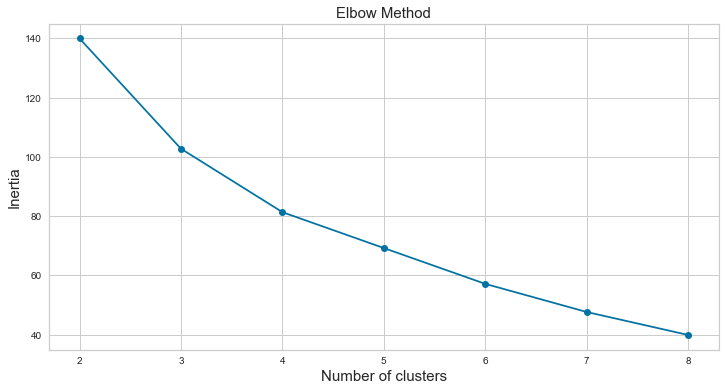

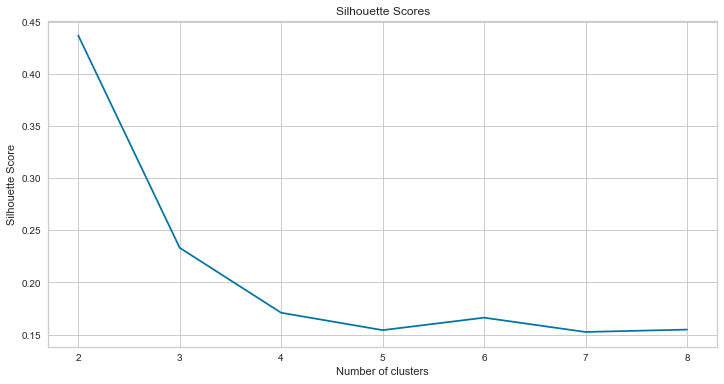

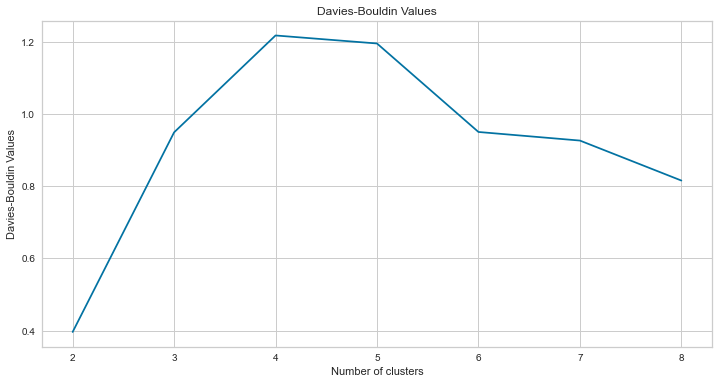

In [53]:
plot_cluster_eval(X_1_scaled, 2, 8)

We will divide the data into 3 clusters as silhouette and DB values are close to the optimum scores.  

In [54]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_1_scaled.drop('country', axis = 1))
X_1['cluster_label'] = kmeans.labels_
X_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,cluster_label
0,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,Afghanistan,1
1,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,Benin,0
2,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,Burkina Faso,1
3,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,Burundi,1
4,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,Cameroon,0


In [55]:
X_1_mean = X_1.groupby('cluster_label').mean()
X_1_mean

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_label,,,,,,,,,
0,112.620000,34.080000,4.990000,36.380000,2476.000000,5.715,56.78,5.546000,1129.000000
1,112.185714,22.115714,7.352857,39.564286,1177.357143,9.005,56.20,5.801429,482.142857
2,208.000000,15.300000,6.910000,64.700000,1500.000000,5.450,32.10,3.330000,662.000000


In [58]:
means = X_1_mean.describe().iloc[1]
means

child_mort     144.268571
exports         23.831905
health           6.417619
imports         46.881429
income        1717.785714
inflation        6.723333
life_expec      48.360000
total_fer        4.892476
gdpp           757.714286
Name: mean, dtype: float64

In [59]:
X_1_compare = X_1_mean.copy()
for index, columns in X_1_compare.iterrows():
    for col in range(len(columns)):
        if X_1_compare.iloc[index, col]>means[col]:
            X_1_compare.iloc[index, col] = 'Above'
        else:
            X_1_compare.iloc[index, col] = 'Below'

X_1_compare

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_label,,,,,,,,,
0,Below,Above,Below,Below,Above,Below,Above,Above,Above
1,Below,Below,Above,Below,Below,Above,Above,Above,Below
2,Above,Below,Above,Above,Below,Below,Below,Below,Below


In [60]:
cluster_1_info = defaultdict(list)
for indx, i in enumerate(X_1['cluster_label']):
    cluster_1_info[i].append(X_1.iloc[indx, :]["country"])

sorted_keys = sorted(cluster_1_info.keys())
cluster_1_info = {key: cluster_1_info[key] for key in sorted_keys}
    
for key, value in cluster_1_info.items():
    print('Cluster Number ', key+1, ':', value)

Cluster Number  1 : ['Benin', 'Cameroon', 'Chad', "Cote d'Ivoire", 'Zambia']
Cluster Number  2 : ['Afghanistan', 'Burkina Faso', 'Burundi', 'Central African Republic', 'Congo, Dem. Rep.', 'Guinea', 'Guinea-Bissau', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Sierra Leone', 'Togo', 'Uganda']
Cluster Number  3 : ['Haiti']


In [61]:
X_2 = X_1[np.logical_or(X_1['cluster_label'] == 1, X_1['cluster_label'] == 2)].drop('cluster_label', axis = 1).reset_index(drop = True)
X_2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,90.2,10.00,7.58,44.9,1610,9.44,56.2,5.82,553,Afghanistan
1,116.0,19.20,6.74,29.6,1430,6.81,57.9,5.87,575,Burkina Faso
2,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,Burundi
3,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,Central African Republic
4,116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,"Congo, Dem. Rep."
5,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648,Guinea
6,114.0,14.90,8.50,35.2,1390,2.97,55.6,5.05,547,Guinea-Bissau
7,208.0,15.30,6.91,64.7,1500,5.45,32.1,3.33,662,Haiti
8,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,Malawi
9,137.0,22.80,4.98,35.1,1870,4.37,59.5,6.55,708,Mali


In [62]:
print('The countries that would need help the most seem to be:')
print(list(X_2['country']) + ['Nigeria'])

The countries that would need help the most seem to be:
['Afghanistan', 'Burkina Faso', 'Burundi', 'Central African Republic', 'Congo, Dem. Rep.', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Sierra Leone', 'Togo', 'Uganda', 'Nigeria']
